## Trabajo Practico 1: Conveccion externa

### Enunciado

Un condensador de vapor refrigerado por aire opera en flujo cruzado de acuerdo a un arreglo cuadrado de $400$ tubos en linea ($N_{L}=N_{T}=20$) con un diametro de tubo externo de $20$mm, paso longitudinal $S_{L}=60$mm y paso transversal $S_{T}=30$mm. Vapor saturado a una presion de $2.455$bar circula por los tubos, mientras que la temperatura en la superficie externa a los tubos puede asumirse uniforme ($T_{s}=390$K) a medida que ocurre la condensacion en su interior.

**(a)** Siendo la temperatura y velocidad del flujo de aire que entra al arreglo iguales a $T_{i}=300$K y $V=4$m/s, determine la temperatura de salida del aire $T_{o}$. Como primer aproximacion, evalue las propiedades del aire a $300$K.

**(b)** Siendo la longitud de tubos de $2$m, determine la velocidad de transferencia de calor y el caudal de condensado.

**(c)** Analice el efecto causado por un incremento de $N_{L}$ en un factor $2$ mientras que $S_{L}$ se reduce hasta $30$mm. Para esta configuracion, explore el efecto causado por cambios en la velocidad del aire.

![](https://drive.google.com/uc?export=view&id=1jB3GduSqe6QFQBi8zbd7Xp15qNLpZPir)

In [ ]:
!pip install ht
!pip install thermo

In [ ]:
!pip install ht

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ht
import thermo

In [ ]:
np.sin(np.pi)
np.sin(0)


0.0

In [ ]:
# *********** Datos ***********

# Geometria del arreglo de tubos
D=0.02 # [m]
SL=0.06 # [m]
ST=0.03 # [m]
NL=20
NT=20
N=NL*NT
L=2 # [m]

# Condiciones de flujo
V=4 # [m/s]
Ti=300 # Temperatura de entrada de refrigerante [K]

# Temperatura de superficie
Ts=390 # [K]

# Presion de vapor saturado
Psat=245500 # [Pa]

In [ ]:
# *********** Propiedades ***********

air_i = thermo.Mixture('air',T=Ti)
rho_i = air_i.rho # [kg/m^3]
Cp_i = air_i.Cp # [J/kgK]
nu_i = air_i.nu # [m^2/s]
k_i = air_i.k # [W/mK]
Pr_i = air_i.Pr

air_s = thermo.Mixture('air',T=Ts)
Pr_s = air_s.Pr

steam = thermo.Chemical('water')

# Determina la temperatura a la cual el agua tiene una presion de vapor de 2.455 bar:
Tsat = steam.VaporPressure.solve_prop(Psat) # [K]

# Establece condiciones de operacion
steam.calculate(T=Tsat,P=Psat)

Hfg = steam.Hvap # Calor latente de vaporizacion [J/kg]


In [ ]:
print air_i
print rho_i
print steam
print Hfg

<Mixture, components=['nitrogen', 'argon', 'oxygen'], mole fractions=[0.7812, 0.0092, 0.2096], T=300.00 K, P=101325 Pa>
1.17698235001
<Chemical [water], T=399.99 K, P=245500 Pa>
2190991.29231


***Correlación de Zukauskas***

Calcula el numero de Nusselt para una disposicion de flujo cruzado a traves de un tubo:

$Nu_{D}=CRe^{m}Pr^{n}\left(\frac{Pr}{Pr_s}\right)^{1/4}$

In [ ]:
# *********** Analisis (a) ***********

# Velocidad maxima de flujo en el banco de tubos
V_max = (ST/(ST-D))*V # [m/s]

# Numero de Reynolds
Re_max = V_max*D/nu_i

# Numero de Nusselt
Nu = ht.Nu_cylinder_Zukauskas(Re_max,Pr_i,Pr_s)

# Coeficiente de transferencia de calor promedio
h = Nu*k_i/D # [W/m^2K]

# Temperatura de salida de refrigerante
To = Ts-(Ts-Ti)*np.exp(-np.pi*D*N*h/(rho_i*V*NT*ST*Cp_i)) # [K]

ht

In [ ]:
ht.LMTD?


In [ ]:
print To

353.03953251856166


In [ ]:
# *********** Analisis (b) ***********

# Diferencia de temperatura media logaritmica
dTlm = ht.LMTD(Ts,Ts,Ti,To)

# Velocidad de transferencia de calor
q = N*h*np.pi*D*L*dTlm # [W]

# Caudal de condensado
mc = q/Hfg # [kg/s]

In [ ]:
print q,mc

602193.2811231018 0.2748496916603017


In [ ]:
# *********** Analisis (c) ***********
# Efecto causado al duplicar el area superficial del banco de tubos

def condensate():
    V_max = (ST/(ST-D))*V # [m/s]
    Re_max = V_max*D/nu_m
    Nu = ht.Nu_cylinder_Zukauskas(Re_max,Pr_m,Pr_s)
    h = Nu*k_m/D # [W/m^2K]
    To = Ts-(Ts-Ti)*np.exp(-np.pi*D*N*h/(rho_m*V*NT*ST*Cp_m)) # [K]
    dTlm = ht.LMTD(Ts,Ts,Ti,To)
    q = N*h*np.pi*D*L*dTlm # [W]
    mc = q/Hfg # [kg/s]
    return To,dTlm,q,mc

# Evalua propiedades del aire a una temperatura media entre entrada y salida
Tm = (Ti+To)/2

# Propiedades del aire para la nueva configuracion
air_m = thermo.Mixture('air',T=Tm)
rho_m = air_m.rho # [kg/m^3]
Cp_m = air_m.Cp # [J/kgK]
nu_m = air_m.nu # [m^2/s]
k_m = air_m.k # [W/mK]
Pr_m = air_m.Pr

# Geometria de la nueva configuracion
SL=SL/2 # [m]
NL=NL*2
N=NL*NT

# Valores resultado de la nueva configuracion
[To_1,dTlm_1,q_1,mc_1]=condensate()

/usr/local/lib/python2.7/dist-packages/thermo/volume.py:1294: RuntimeWarning: invalid value encountered in double_scalars
  B = Pc*(-1 + a*tau**(1/3.) + b*tau**(2/3.) + d*tau + e*tau**(4/3.))
/usr/local/lib/python2.7/dist-packages/thermo/volume.py:437: RuntimeWarning: invalid value encountered in double_scalars
  - 0.81446*(1-Tr) + 0.190454*(1-Tr)**(4/3.)
/usr/local/lib/python2.7/dist-packages/thermo/viscosity.py:826: RuntimeWarning: invalid value encountered in double_scalars
  D = 0.3257/((1.0039-Tr**2.573)**0.2906) - 0.2086


In [ ]:
print 'Configuracion original',To,dTlm,q,mc
print 'Configuracion nueva',To_1,dTlm_1,q_1,mc_1

Configuracion original 353.03953251856166 59.59760698321435 602193.2811231018 0.2748496916603017
Configuracion nueva 387.9350810988662 23.295797031294505 459272.7197048725 0.209618687813071


In [ ]:
# *********** Analisis (c) ***********
# Efecto causado por cambios en la velocidad del aire para la nueva configuracion
dTlm_v = []
mc_v = []
Vini=0.5; Vfin=10.0; dV=0.1
vels = np.arange(Vini,Vfin+dV,dV)

for V in vels: # [m/s]
  [To,dTlm,q,mc]=condensate()
  dTlm_v.append(dTlm)
  mc_v.append(mc)


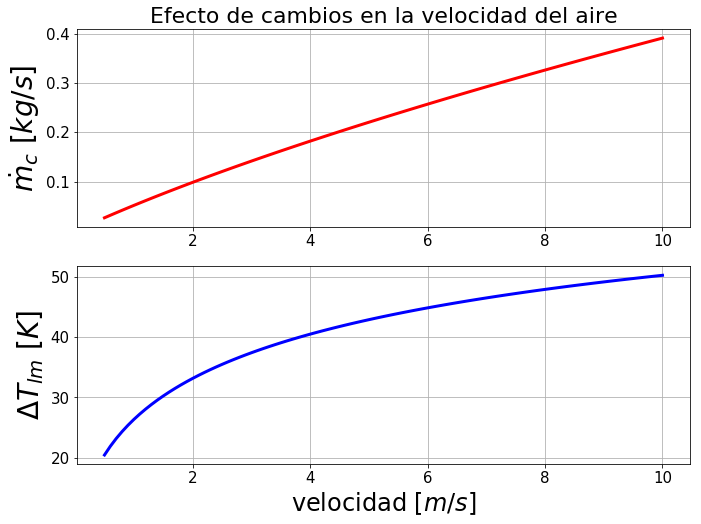

In [ ]:
# %%%%%%%%%%%%%%%%%%%% GRAFICA %%%%%%%%%%%%%%%%%%%
h,w=2,1
fig = plt.figure(figsize=(11,8))

# ************* Caudal de condensado *************
plt.subplot(h,w,1)
plt.plot(vels,mc_v,'r-',lw=3)
plt.ylabel('$\.{m}_{c}$ [$kg/s$]',fontsize=28,color='k')
plt.tick_params(axis='both',which='major',labelsize=15)
plt.grid(b=True,which='major')
plt.title('Efecto de cambios en la velocidad del aire',fontsize=22)

# ****** Diferencia de temperatura media logaritmica ******
plt.subplot(h,w,2)
plt.plot(vels,dTlm_v,'b-',lw=3)
plt.ylabel('$\Delta T_{lm}$ [$K$]',fontsize=28,color='k')
plt.tick_params(axis='both',which='major',labelsize=15)
plt.grid(b=True,which='major')
plt.xlabel('velocidad [$m/s$]',fontsize=24,color='k')

# *********************************************
plt.show()


### **Conclusiones**

(1) El caudal de condensado aumenta ***levemente*** al incrementar el area superficial del banco de tubos.

*Causa:* $\uparrow N_{L}\;\Rightarrow\;\uparrow N\;\Rightarrow\;\uparrow\dot{q}$ ... si bien
$\uparrow N_{L}\;\Rightarrow\;\uparrow T_{o}\;\Rightarrow\;\downarrow\Delta T_{lm}\;\Rightarrow\;\downarrow\dot{q}$

(2) El caudal de condensado aumenta ***considerablemente*** al incrementar el flujo masico de refrigerante.

*Causa:* $\uparrow V\;\Rightarrow\;\uparrow\overline{h}\;\Rightarrow\;\uparrow\dot{q}$ ... ademas
$\uparrow V\;\Rightarrow\;\downarrow T_{o}\;\Rightarrow\;\uparrow\Delta T_{lm}\;\Rightarrow\;\uparrow\dot{q}$

**Nota:** Podria optar por un refrigerante liquido ($\uparrow\uparrow\overline{h}$) si deseo aumentar el caudal de condensado.